## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [11]:
from __future__ import absolute_import, division, print_function
import numpy as np
import keras
import pickle
from matplotlib import pyplot as plt
import seaborn as sns
from keras.utils import np_utils

from keras.datasets import fashion_mnist
(x_train, y_train_num), (x_test, y_test_num) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [16]:
print('--- THE DATA ---')

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

--- THE DATA ---
60000 train samples
10000 test samples


### Find dimensions of an image in the dataset

x_train shape: (60000, 28, 28)


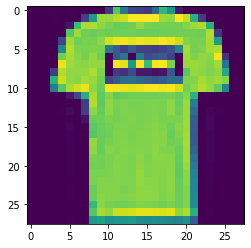

In [18]:
print('x_train shape:', x_train.shape) # Image size is 28x28 pixels
plt.imshow(x_train[1])
plt.show()

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
y_train = np_utils.to_categorical(y_train_num, 10)
y_test = np_utils.to_categorical(y_test_num, 10)

### Normalize both the train and test image data from 0-255 to 0-1

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')
x_train /= 255
x_test /= 255

### Import the necessary layers from keras to build the model

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D


### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [0]:

BATCH_SIZE = 32
EPOCHS = 5

In [22]:
# Define the Type of Model
model1 = Sequential()

# 1st Conv Layer
model1.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model1.add(Activation('relu'))

# 2nd Conv Layer
model1.add(Convolution2D(32, 3, 3))
model1.add(Activation('relu'))

# Flatten 
model1.add(Flatten())
model1.add(Dense(128))
model1.add(Activation('relu'))

# Prediction Layer
model1.add(Dense(10))
model1.add(Activation('softmax'))# Layer 2


# Loss and Optimizer
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]# [stats, early_stopping]



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  


In [23]:
# Train the model1
model1.fit(x_train, y_train, nb_epoch=EPOCHS, batch_size=BATCH_SIZE, 
           validation_data=(x_test, y_test), callbacks=callback_list, verbose=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/5





60000/60000 [==============================] - 20s 338us/step - loss: 0.3857 - acc: 0.8615 - val_loss: 0.2931 - val_acc: 0.8955
Epoch 2/5
60000/60000 [==============================] - 12s 205us/step - loss: 0.2408 - acc: 0.9108 - val_loss: 0.2688 - val_acc: 0.9000
Epoch 3/5
60000/60000 [==============================] - 12s 204us/step - loss: 0.1812 - acc: 0.9325 - val_loss: 0.2401 - val_acc: 0.9164
Epoch 4/5
60000/60000 [==============================] - 12s 200us/step - loss: 0.1333 - acc: 0.9497 - val_loss: 0.2589 - val_acc: 0.9193
Epoch 5/5
60000/60000 [==============================] - 12s 205us/step - loss: 0.0942 - acc: 0.9648 - val_loss: 0.2917 - val_acc: 0.9099


In [24]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_9 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_10 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               2359424   
_________________________________________________________________
activation_11 (Activation)   (None, 128)              

In [32]:
loss_and_metrics = model1.evaluate(x_test, y_test)
print(loss_and_metrics)

10000/10000 [==============================] - 1s 77us/step
[0.2916536043465138, 0.9099]


### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [25]:
# Define the Type of Model
model2 = Sequential()

# 1st Conv Layer
model2.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model2.add(Activation('relu'))

# 2nd Conv Layer
model2.add(Convolution2D(32, 3, 3))
model2.add(Activation('relu'))

# Max Pooling
model2.add(MaxPooling2D(pool_size=(2,2)))
    
# Dropout
model2.add(Dropout(0.25))


# Flatten 
model2.add(Flatten())
model2.add(Dense(128))
model2.add(Activation('relu'))

# Prediction Layer
model2.add(Dense(10))
model2.add(Activation('softmax'))# Layer 2


# Loss and Optimizer
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]# [stats, early_stopping]




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  


In [26]:
# Train the model2
model2.fit(x_train, y_train, nb_epoch=EPOCHS, batch_size=BATCH_SIZE, 
           validation_data=(x_test, y_test), callbacks=callback_list, verbose=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 13s 211us/step - loss: 0.3983 - acc: 0.8560 - val_loss: 0.3089 - val_acc: 0.8873
Epoch 2/5
60000/60000 [==============================] - 12s 203us/step - loss: 0.2588 - acc: 0.9046 - val_loss: 0.2613 - val_acc: 0.9030
Epoch 3/5
60000/60000 [==============================] - 12s 203us/step - loss: 0.2111 - acc: 0.9218 - val_loss: 0.2434 - val_acc: 0.9098
Epoch 4/5
60000/60000 [==============================] - 12s 197us/step - loss: 0.1753 - acc: 0.9350 - val_loss: 0.2230 - val_acc: 0.9206
Epoch 5/5
60000/60000 [==============================] - 12s 203us/step - loss: 0.1477 - acc: 0.9449 - val_loss: 0.2250 - val_acc: 0.9233


In [27]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_13 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_14 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4608)             

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(x_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

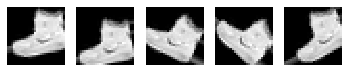

In [29]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [30]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.fit_generator(datagen.flow(x_train, y_train,
                        batch_size=BATCH_SIZE),
                        samples_per_epoch=x_train.shape[0],
                        nb_epoch=EPOCHS,
                        validation_data=(x_test, y_test), callbacks=callback_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=1875, epochs=5)`
  


Epoch 1/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.6996 - acc: 0.7427 - val_loss: 0.3222 - val_acc: 0.8869
Epoch 2/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.5183 - acc: 0.8086 - val_loss: 0.3441 - val_acc: 0.8777
Epoch 3/5
1875/1875 [==============================] - 27s 15ms/step - loss: 0.4668 - acc: 0.8273 - val_loss: 0.3315 - val_acc: 0.8853
Epoch 4/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.4433 - acc: 0.8365 - val_loss: 0.3117 - val_acc: 0.8894
Epoch 5/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.4183 - acc: 0.8461 - val_loss: 0.3146 - val_acc: 0.8897


###  Report the final train and validation accuracy

In [31]:
loss_and_metrics = model2.evaluate(x_test, y_test)
print(loss_and_metrics)

10000/10000 [==============================] - 1s 70us/step
[0.3146405952334404, 0.8897]


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [4]:
from keras.datasets import cifar10 # subroutines for fetching the CIFAR-10 dataset

### **Load CIFAR10 dataset**

In [13]:
(X_train2, y_train2), (X_test2, y_test2) = cifar10.load_data() # fetch CIFAR-10 data

print(X_train2.shape)

(50000, 32, 32, 3)


In [14]:
%matplotlib inline
# Load/Prep the Data
num_train, depth, height, width = X_train2.shape # there are 50000 training examples in CIFAR-10 
num_test = X_test2.shape[0] # there are 10000 test examples in CIFAR-10
num_classes = np.unique(y_train2).shape[0] # there are 10 image classes

X_train2 = X_train2.astype('float32') 
X_test2 = X_test2.astype('float32')
X_train2 /= np.max(X_train2) # Normalise data to [0, 1] range
X_test2 /= np.max(X_train2) # Normalise data to [0, 1] range


### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [21]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen2 = ImageDataGenerator(
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=True)  # randomly flip images


### **Prepare/fit the generator.**

In [22]:

# Prepare the generator
datagen2.fit(X_train2)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

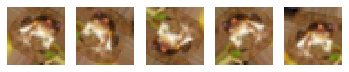

In [23]:
gen = datagen2.flow(X_train2[:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()